In [15]:
import antenna_selection.as_bb_par
import importlib
importlib.reload(antenna_selection.as_bb_par)

<module 'antenna_selection.as_bb_par' from '/scratch/sagar/Projects/combopt/branch-and-bound-ml/antenna_selection/as_bb_par.py'>

In [32]:
from antenna_selection.as_bb_par import *
import numpy as np

def solve_bb(instance, max_ant=5, max_iter=10000, policy='default', policy_type='gnn', oracle_opt=None):
    t1 = time.time()
    if policy_type == 'default':
        env = ASBBenv(observation_function=Observation, epsilon=0.001)
    elif policy_type == 'gnn':
        env = ASBBenv(observation_function=Observation, epsilon=0.001)
    elif policy_type == 'linear':
        env = ASBBenv(observation_function=LinearObservation, epsilon=0.001)
    elif policy_type == 'oracle':
        env = ASBBenv(observation_function=Observation, epsilon=0.001)
        pass

    branching_policy = DefaultBranchingPolicy()

    t1 = time.time()

    env.reset(instance, max_ant=max_ant)
    timestep = 0
    done = False
    lb_list = []
    ub_list = []
    while timestep < max_iter and len(env.nodes)>0 and not done:
        print('timestep', timestep, env.global_U, env.global_L)
        
        env.fathom_nodes()
        if len(env.nodes) == 0:
            break
        node_id, node_feats, label = env.select_node()
        
        if len(env.nodes) == 0:
            break
        # prune_node = env.prune(node_feats)
        # if prune_node:
        #     env.delete_node(node_id)
        #     continue
        # else:
        branching_var = branching_policy.select_variable_old(node_feats, env.action_set_indices)
        done = env.push_children(branching_var, node_id, parallel=False)
        timestep = timestep+1
        lb_list.append(env.global_L)
        ub_list.append(env.global_U)
        
    print('ended')
    print(env.z_incumbent)
    # returns the solution, objective value, timestep and the time taken
    return env.z_incumbent.copy(), env.global_U, timestep , time.time()-t1, lb_list, ub_list

np.random.seed(seed = 150)
N = 8
M = 5
max_ant = 3

u_avg = 0
t_avg = 0
tstep_avg = 0
for i in range(1):
    H = (np.random.randn(N, M) + 1j*np.random.randn(N,M))/np.sqrt(2)
    instance = np.stack((np.real(H), np.imag(H)), axis=0)
    _, global_U, timesteps, t, lb_list, ub_list = solve_bb(instance, max_ant=max_ant, max_iter = 7000)
    u_avg += global_U
    t_avg += t
    tstep_avg += timesteps

print(u_avg, t_avg, tstep_avg, u_avg)

    # print('bb solution: {}, optimal: {}'.format(global_U, optimal_f) )



 solution in reset 2.9999999999100897, optimality True

reloaded
timestep 0 9.889140364332603 0.8443348608751272
reloaded
reloaded
timestep 1 9.889140364332603 0.844334744623778
reloaded
reloaded
timestep 2 9.889140364332603 0.8443348797211997
reloaded
timestep 3 9.602044297896049 0.9037484200176487
reloaded
reloaded
timestep 4 9.602044297896049 0.9037485238395361
reloaded
timestep 5 9.580471566738021 0.9583468355263564
reloaded
timestep 6 9.580471566738021 1.0301914847790128
reloaded
reloaded
timestep 7 4.9032114751877005 1.0301914183222873
reloaded
timestep 8 4.9032114751877005 1.0517967555438221
reloaded
reloaded
timestep 9 4.9032114751877005 1.0517967280489637
reloaded
reloaded
timestep 10 4.9032114751877005 1.0517968007414606
reloaded
timestep 11 4.9032114751877005 1.1279656847325306
reloaded
timestep 12 4.9032114751877005 1.1446132932675885
reloaded
reloaded
timestep 13 4.9032114751877005 1.1446132746609337
reloaded
reloaded
timestep 14 4.9032114751877005 1.144613321105919
reloa

In [17]:
lb_list_new_branch_min_feas = lb_list.copy()
ub_list_new_branch_min_feas = ub_list.copy()


In [33]:
lb_list_old_feas = lb_list.copy()
ub_list_old_feas = ub_list.copy()


In [31]:
lb_list_new_branch_feas = lb_list.copy()
ub_list_new_branch_feas = ub_list.copy()


In [6]:
lb_list_new_branch = lb_list.copy()
ub_list_new_branch = ub_list.copy()


In [3]:
lb_list_old = lb_list.copy()
ub_list_old = ub_list.copy()


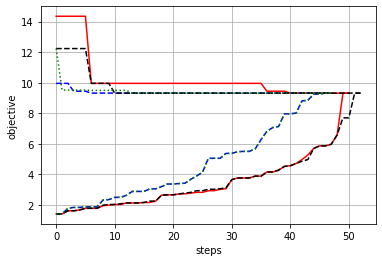

In [32]:
import matplotlib.pyplot as plt

plt.plot(lb_list_old, color='red')
plt.plot(ub_list_old, color='red')

plt.plot(lb_list_new_branch, linestyle='--', color='blue')
plt.plot(ub_list_new_branch, linestyle='--', color='blue')

plt.plot(lb_list_old_feas, linestyle='--', color='black')
plt.plot(ub_list_old_feas, linestyle='--', color='black')


plt.plot(lb_list_new_branch_feas, linestyle='dotted', color='green')
plt.plot(ub_list_new_branch_feas, linestyle='dotted', color='green')


plt.xlabel('steps')
plt.ylabel('objective')
plt.grid('on')

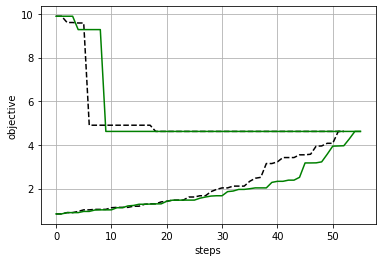

In [34]:
import matplotlib.pyplot as plt

# plt.plot(lb_list_old, color='red')
# plt.plot(ub_list_old, color='red')

# plt.plot(lb_list_new_branch, linestyle='--', color='blue')
# plt.plot(ub_list_new_branch, linestyle='--', color='blue')

plt.plot(lb_list_old_feas, linestyle='--', color='black')
plt.plot(ub_list_old_feas, linestyle='--', color='black')


plt.plot(lb_list_new_branch_feas, color='green')
plt.plot(ub_list_new_branch_feas, color='green')

# plt.plot(lb_list_new_branch_min_feas, linestyle='dotted', color='black')
# plt.plot(ub_list_new_branch_min_feas, linestyle='dotted', color='black')


plt.xlabel('steps')
plt.ylabel('objective')
plt.grid('on')

## Use the functional solve relaxation

In [33]:
## Plots BB convergence for the paper
import robust_beamforming.bb_unified as bb

import importlib
importlib.reload(bb)

import numpy as np

np.random.seed(seed = 200)
N = 8
M = 4
max_ant = 5

u_avg = 0
t_avg = 0
tstep_avg = 0
for i in range(1):
    H = (np.random.randn(N, M) + 1j*np.random.randn(N,M))/np.sqrt(2)
    instance = np.stack((np.real(H), np.imag(H)), axis=0)
    zf, global_U, timesteps, t, lb_list, ub_list = bb.solve_bb(instance, max_ant=max_ant, max_iter = 10000, robust_beamforming=True)
    u_avg += global_U
    t_avg += t
    tstep_avg += timesteps
print(zf)
print(u_avg, t_avg, tstep_avg, u_avg)

total problems is 0, total unique problems 0
total problems is 1, total unique problems 1

timestep 0 0.935499272658114 0.6206766452341469
children mask sol [0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 0. 0.]
total problems is 2, total unique problems 2
total problems is 3, total unique problems 3
children mask sol [0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 1. 0.]
total problems is 4, total unique problems 4
total problems is 5, total unique problems 4

timestep 1 0.9354992373909685 0.6206766452341469
children mask sol [0. 1. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 1. 0.]
total problems is 6, total unique problems 4
total problems is 7, total unique problems 5
children mask sol [0. 1. 0. 0. 0. 0. 1. 0.] [0. 1. 0. 0. 0. 0. 1. 0.]
total problems is 8, total unique problems 6
total problems is 9, total unique problems 6

timestep 2 0.9354992373909685 0.6206766452341469
children mask sol [0. 1. 0. 0. 1. 0. 1. 0.] [0. 1. 0. 0. 0. 0. 1. 0.]
total problems is 10, total unique problems 6
total

In [30]:
zf

array([1., 1., 0., 1., 1., 0., 1., 0.])

In [32]:
global_U

0.8360919207310429

## Use the class based old solve relaxation method

In [24]:
import antenna_selection.as_bb_par as as_bb
import importlib
importlib.reload(as_bb)

import numpy as np

np.random.seed(seed = 100)
N = 8
M = 4
max_ant = 5

u_avg = 0
t_avg = 0
tstep_avg = 0
for i in range(1):
#     H = (np.random.randn(N, M) + 1j*np.random.randn(N,M))/np.sqrt(2)
    instance2 = np.stack((np.real(H), np.imag(H)), axis=0)
    zc, global_U, timesteps, t, lb_list, ub_list = as_bb.solve_bb(instance2, max_ant=max_ant, max_iter = 10000)
    u_avg += global_U
    t_avg += t
    tstep_avg += timesteps

print(u_avg, t_avg, tstep_avg, u_avg)



 solution in reset 4.999999999888623, optimality True

timestep 0 1.5136408350971222 0.7992636640291462

timestep 1 1.35105633673672 0.7992635991777279
timestep 1 1.35105633673672 0.7992635991777279

timestep 2 1.35105633673672 0.7992636064279017
timestep 2 1.35105633673672 0.7992636064279017

timestep 3 1.35105633673672 0.7992636180839778
timestep 3 1.35105633673672 0.7992636180839778

timestep 4 1.35105633673672 0.7992636095817699
timestep 4 1.35105633673672 0.7992636095817699

timestep 5 1.35105633673672 0.9814355959465516
timestep 5 1.35105633673672 0.9814355959465516

timestep 6 1.35105633673672 1.0323384292778486
timestep 6 1.35105633673672 1.0323384292778486

timestep 7 1.35105633673672 1.032338452349887
timestep 7 1.35105633673672 1.032338452349887

timestep 8 1.35105633673672 1.0323384466561614
timestep 8 1.35105633673672 1.0323384466561614

timestep 9 1.3321723323617034 1.0338605476461258
timestep 9 1.3321723323617034 1.0338605476461258

timestep 10 1.3321723323617034 1.0338

In [11]:
import antenna_selection.solve_relaxation as sr
import importlib
importlib.reload(sr)


# compute W with function based
_, Wf, objf, optf = sr.solve_relaxed(H=H, z_mask=np.ones(N), z_sol=zc)
sinrf = sr.compute_sinr(W=Wf, H=H)

# compute W with class based
bm = sr.BeamformingWithSelectedAntennas(H, max_ant=max_ant)
Wc,objc,optc=  bm.solve_beamforming(z=zc)
sinrc = sr.compute_sinr(W=Wc, H=H)


sinr computation (2,) (2,)
sinr computation (2,) (2,)


In [12]:
np.linalg.norm(Wf,'fro')**2

0.4926504697889066

In [12]:
import cvxpy as cp
H_short = H.copy()
W_short = Wf.copy()
for n in range(N-1, -1, -1):
    if not zc[n]:
        H_short = np.concatenate((H_short[:n, :], H_short[n+1:, :]), axis=0)
        W_short = np.concatenate((W_short[:n, :], W_short[n+1:, :]), axis=0)

for m in range(M):
    Imask = np.eye(M)
    Imask[m,m] = 0
    # Check constraint satisfaction
    print(np.real(np.matmul(np.expand_dims(H_short[:,m], axis=0).conj(), W_short[:,m])))
    rhs = cp.norm(cp.hstack(((W_short @ Imask).T.conj() @ H_short[:,m], np.ones(1))), 2)
#     print(rhs.value)

    print(np.real(np.matmul(np.expand_dims(H[:,m], axis=0).conj(), np.multiply(Wf[:,m], zc))))
    rhs2 = cp.norm(cp.hstack((((Wf @ Imask).conj().T @ cp.diag(zc)) @ H[:,m], np.ones(1))), 2)
    print(rhs.value, rhs2.value)

[1.04270767]
[1.04270767]
1.042707671469082 1.042707671469082
[1.03935754]
[1.03935754]
1.0393575343032495 1.0393575343032495


In [13]:
W_H = np.matmul(H.conj().T, Wf)
W_H = np.abs(W_H)**2
mask = np.eye(*W_H.shape)
mask_comp = 1-mask
direct = np.sum(W_H*mask, axis=1)
interference = W_H*mask_comp
aggregate_interference = np.sum(interference, axis=1)
print('sinr computation', direct.shape, aggregate_interference.shape)

sinr = direct/(aggregate_interference + 1)
sinr


sinr computation (2,) (2,)


array([1.00000001, 1.00000001])

In [42]:
import cvxpy as cp
for m in range(M):
    Imask = np.eye(M)
    Imask[m,m] = 0
    print(np.real(np.matmul(np.expand_dims(H[:,m], axis=0), np.multiply(Wc[:,m], z_solution))))
    rhs = cp.norm(cp.hstack((((Wf @ Imask).T.conj() @ np.diag(z_solution)) @ H[:,m], np.ones(1))), 2)
    rhs = cp.norm(cp.hstack((((Wf @ Imask).conj().T @ cp.diag(z_solution)) @ H[:,m], np.ones(1))), 2)
    print(rhs.value)
    print()

[1.11211455]
1.140070912504171

[1.14226747]
1.2205790042679363

[1.03063236]
1.1174107175402705

[1.00865913]
1.04505983849524



In [17]:
import pickle
save_result_filepath = '../data/omar_eval/omar_evaluation_result.pkl'
with open(save_result_filepath, 'rb') as handle:
    data = pickle.load( handle)

In [7]:
import pickle
# save_result_filepath = 'data/bb_eval_data.pkl'
save_data_filepath = 'data/bb_eval_data_additional.pkl'

with open(save_data_filepath, 'rb') as handle:
    data1 = pickle.load( handle)
    
combinations = [(8,2,4),
                (8,4,4),
                (8,6,4)]

[(combinations[i], np.mean(data1['data'][i][4]) ) for i in range(len(data1['data']))]

[((8, 2, 4), 34.06666666666667),
 ((8, 4, 4), 47.3),
 ((8, 6, 4), 82.93333333333334)]

In [ ]:
data1

In [6]:
len(data1['data'])

11

In [1]:
import pickle
save_result_filepath = 'data/bb_eval_data.pkl'
with open(save_result_filepath, 'rb') as handle:
    data = pickle.load( handle)

In [18]:
data['data'][]

IndexError: list index out of range

In [21]:
len(data['data'])

11

In [48]:
import pickle
save_data_filepath = 'data/bb_eval_data_additional2.pkl'
with open(save_data_filepath, 'rb') as handle:
    data = pickle.load( handle)

import numpy as np
# from math import comb
import math
def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

# combinations = [(4,2,2),
#                 (4,3,2),
#                 (8,3,4),
#                 (8,5,4),
#                 (8,7,4),
#                 (10,4,6),
#                 (10,6,6),
#                 (10,8,6),
#                 (12,6,8),
#                 (12,8,8),
#                 (12,10,8)]

combinations = [(10,2,6),
                (12,2,8),
                (12,4,8)]

# combinations1 = [(8,2,4),
#                 (8,4,4),
#                 (8,6,4)]
ll = [(str(combinations[i]), np.mean(data['data'][i][3]), np.mean(data['data'][i][4]), nCr(combinations[i][0], combinations[i][2]) ) for i in range(len(data['data']))]
# ll2 = [(str(combinations1[i]), np.mean(data1['data'][i][3]), np.mean(data1['data'][i][4]), nCr(combinations1[i][0], combinations1[i][2]) ) for i in range(len(data1['data']))]
# ll = ll + ll2
for i in range(len(ll)):
#     ll[i]  = [str(item) for item in ll[i] ]
    
    print('{:>12}     {:>.2f}     {:.2f}      {}'.format(*ll[i]))

  (10, 2, 6)     2.28     50.20      210
  (12, 2, 8)     2.95     65.53      495
  (12, 4, 8)     10.57     137.80      495


In [33]:
str(combinations[0])

'(4, 2, 2)'

In [14]:
ll[i]

((4, 2, 2), 0.3326169808705648, 6.866666666666666, 6.0)

In [22]:
[5]+ [5]

[5, 5]

In [17]:
4*3*2/4

6.0

In [19]:
data
for i in range(len(data['size'])):
    print(data['size'][i],data['ogap'][i], data['time'][i], data['sol_rate'][i])


(4, 2, 2) 6.60427057302319 0.14427974224090576 1.0
(4, 3, 2) 13.12138438791363 0.7195309321085612 0.7333333333333333
(8, 3, 4) 2.940611572145706 0.6337696075439453 1.0
(8, 5, 4) 17.506613065695255 0.6308382034301758 1.0
(8, 7, 4) 1000000000.0 3.8565392096837363 0.0
(10, 4, 6) 2.759395491872632 1.8216540177663167 1.0
(10, 6, 6) 3.5210480853781214 1.1590567588806153 1.0
(10, 8, 6) 10.116734025867176 1.895974095662435 0.9
(12, 6, 8) 2.9236608572234486 2.0017838954925535 1.0
(12, 8, 8) 5.953613919242764 1.4699662605921426 1.0
(12, 10, 8) 8.813686159681977 1.9894292195638021 0.9333333333333333


In [1]:
from robust_beamforming.bb_unified import solve_bb
from antenna_selection.as_omar import *
from multiprocessing import Pool
import time
import pickle

def solve_bb_pool(arguments):
    instance, max_ant = arguments
    try:
        result = solve_bb(instance, max_ant=max_ant, robust_beamforming=False)
    except:
        result = None, None, None, None
    return result

N = [8,12,16]
M = [3,8,12]
L = [4,6,10,12]

combinations = []
num_egs = 30
for n in N:
    for m in M:
        if m <= n:
            for l in L:
                if l<n:
                    combinations.append((n,m,l))
                    
# combinations = [(4,2,2),
#                 (4,3,2),
#                 (8,3,4),
#                 (8,5,4),
#                 (8,7,4),
#                 (10,4,6)
#                 (10,6,6),
#                 (10,8,6),
#                 (12,6,8),
#                 (12,8,8),
#                 (12,10,8)]
            
# Compute the ogap of Omar's method using the combinations
save_data_filepath = '../data/omar_eval/omar_evaluation_data.pkl'
save_result_filepath = '../data/omar_eval/omar_evaluation_result.pkl'

result = {'size':[], 'ogap':[], 'time':[], 'sol_rate':[]}
# data = {'instance': [], 'z_opt':[], 'power_opt':[], 'steps':[], 'time':[]}
data = {'size': [], 'data': []}
# Run optimal algorithm and save the result

np.random.seed(100)
combinations = [(8,,4)]
for (n,m,l) in combinations:

# for (n,m,l) in combinations[5:]:
    ogap = 0
    time_avg = 0
    solved_instances = 0
    
    instances = np.random.randn(num_egs, 2, n, m)/np.sqrt(2)
    arguments_oracle = list(zip(list(instances), [l]*num_egs))

    with Pool(num_egs) as p:
        out_oracle = p.map(solve_bb_pool, arguments_oracle)
        print('pool ended')
    
    optimal_solution_list = [out_oracle[i][0] for i in range(len(out_oracle))]
    optimal_objective_list = [out_oracle[i][1] for i in range(len(out_oracle))]
    oracle_time = [out_oracle[i][3] for i in range(len(out_oracle))]
    
    solution_data = (instances, optimal_solution_list, optimal_objective_list, oracle_time)
    data['size'].append((n,m,l))
    data['data'].append(solution_data)
    
    omar_solved_instances = 0
    for i in range(num_egs):
        print("({}, {}, {}), eg: {}".format(n,m,l, i))
        H = instances[i,0,::] + 1j*instances[i,1,::]
        
        if optimal_objective_list[i] is not None:
            # run omar's method
            t1 = time.time()
            try:
                power, z = as_omar(H, max_ant=l)
                # print('power', power)
            except Exception as e:
                print(e)
                power = None
                z = None
            if power is not None:
                ogap += (power-optimal_objective_list[i])/optimal_objective_list[i] * 100
                omar_solved_instances += 1
            # print('solved instances', omar_solved_instances)
            time_avg += time.time() - t1
            solved_instances += 1
    if omar_solved_instances >= 1:
        ogap = ogap/omar_solved_instances 
    else:
        ogap = 1e9
    if solved_instances >= 1:
        omar_solution_rate = omar_solved_instances/solved_instances
        time_avg = time_avg/solved_instances
    else:
        omar_solution_rate = 0
        time_avg = 0
    
    result['size'].append((n,m,l))
    result['ogap'].append(ogap)
    result['time'].append(time_avg)
    result['sol_rate'].append(omar_solution_rate)
    
#     with open(save_result_filepath, 'wb') as handle:
#         pickle.dump(result, handle)
    
#     with open(save_data_filepath, 'wb') as handle:
#         pickle.dump(data, handle)


timestep 0 4.488361524568747 1.1309865026900303

timestep 0 4.59902553025252 1.2282115373961677

timestep 
timestep0  4.1432434030898570  1.051123495081085.202815903854087
 1.6424234382509255

timestep
timestep
timestep
timestep 0    0004.012646410923518    5.8184138628656984.3607359057428544.3236820052405531.1351936833945873   1.326964225949459
1.09547650338607251.210275079809593

timestep

 
timestep0 
timestep 5.698944074760157  0 1.24596935256521343.6804077763432246 0
1.0638554544417576 1.9207124049175472
 0.8531804989426814

timestep
timestep
timestep   00 0 6.686215454759414
timestep 4.571743162126041 9.146814061465015 
timestep 0
timestep1.3958760443552483  1.2662007053478157  1.3681484586003885
0
03.4330164527199125
   4.4874601524974841.17379476822229164.8729232593912934 
timestep
 1.2791542698923482 1.1547121664445492

timestep0
  6.1542165548972290  1.04697514808893553.7338559453795677
 1.246558649244023

timestep 0
timestep  05.46636563056766 
timestep  1.34662206241218785

timestep 11 4.59902553025252 
timestep 2.071972756327512311
 
timestep4.54815187543931 2.0354032167788207 
11 5.257303663915017 1.9055831556014065

timestep 11 4.571743162126041 2.0669570235405756
timestep
 11 3.8294526015223966 1.6360661364171467

timestep 
timestep 1111 
timestep
timestep 3.508107893750131 4.8857911252778035 
timestep11  1.5380985594276249 11 
timestep1.7986947431692946
timestep
11 4.104130730226092
   
timestep 4.360735905742852111.920712404917547211 1.4412577129383726    11
1.72771113510517223.3264410581377441.37204061313083184.134425596924989 
  
3.339113950977291.7108725967150881.4007413308239074 

1.678346656934386

timestep 11 5.202815903854085 2.2745154506139134

timestep 11 3.4330164527199116 1.757343040981258

timestep 11 4.895615820346255 2.043558557204414

timestep 11 
timestep
timestep3.7338559453795677
timestep
timestep   1111  2.1594345089168083 4.04301871926093
  1.955288423311471111 113.8726515186892043.580248789175937  1.6760130682358603

timestep2.1

timestep2222   225.085210806871963  4.5717431621260414.8857911252778035  2.53908864114230062.68899453620388143.096862911121503

timestep
 
timestep22 
timestep22  
3.95529369283598163.7338559453795677   2.361587875987314321
timestep1.9312180514726365
 
3.872651518689204 
timestep  2.76464418094695322
timestep
  4.22691498258447622
timestep  22 2.901942382960063
timestep3.8294526015223966 22
 
timestep 
timestep5.211027193781093 
timestep
timestep
timestep22 2.27040219962738  3.508107893750131   21
 222.580386484964819 222222 4.435285671224562
 2.0929879979477404   4.171655658251098 4.360735905742852
4.599025530252523.938657738285797 4.9288437706949372.1579754392196175    2.5785697143989394
2.2696742922473542.4871021851429243.44664393686161042.45618096652704





timestep 22 1.9207124049175472 1.9207124049175472
ended
[0. 1. 0. 1. 1. 0. 0. 1.]

timestep 22 4.04301871926093 2.865508067324113

timestep 22 3.33911395097729 2.2229085885314803

timestep 23 3.627160227780661 2.330019189198564

timestep  35 3.3264410581377443.33911395097729 2.511583445535876

timestep 33  4.2269149825844762.845658710476606 
3.2183983056902634

timestep 32 4.171655658251098 3.0949311585286963

timestep 
timestep33  343.123298087694116
timestep 
timestep
timestep 3.4330164527199116 2.6077989181569077   33
333.27369985613175133  
 4.0194145466809454.599025530252524.435285671224562   2.9099613918552682.95993869631745632.4229823041474816



timestep 33
timestep 4.04301871926093 3.1311494280866805 
34
timestep  
timestep3.733855945379567733   
timestep343.23808840217654754.928843770694937  
 343.6271602277806613.7281055173566777  
3.9386577382857972.852434442088645 
3.338166457854052

timestep 33 4.8857911252778035 3.098195700052495

timestep 34
timestep  5.211027193781093 333.5011595811900773 
5.085210806871963 
timestep3.9844653625916213
 33 4.571743162126041 3.177362778350259

timestep 33 4.131845269002559
timestep 34 1.9992368938275933 
3.9552936928359816 2.272477835123333

timestep
timestep  3

timestep4.571743162126041 45  48 474.359103446937284 5.211027193781091 
3.8294526015223966 4.8857911252778035  3.79879513829020833.51454412236391934.231418783127941



timestep 
timestep46  464.360735905742852  3.63184095054849283.4586019593842128 
3.285745702106547

timestep 47 4.54815187543931 4.3790377808300525

timestep 47 3.326441058137744 3.326441058137745
ended
[1. 1. 1. 0. 0. 0. 0. 1.]

timestep 
timestep48  473.508107893750131  4.6984647037948373.4639633716872336 
3.967685140647821

timestep
timestep 46  5.202815903854085 475.068864257119552 
4.59902553025252
timestep 
timestep 3.9261700613123915 49
47 
timestep 3.8294526015223966 3.33911395097729 48 3.5145441223639193 3.20004881633967343.9552936928359816
timestep
 
 3.094402385534863748
 4.571743162126041
timestep  4.54157598738112946
 ended5.211027193781091
 [1. 1. 0. 0. 0. 1. 0. 1.]3.9174073855005327


timestep
timestep  4548 4.8857911252778035  3.580248789175937 4.2314187831279413.5356105332837564


timestep 
timestep47  4

sparse iteration  13
sparse iteration  14
sparse iteration  15
sparse iteration  16
sparse iteration  17
sparse iteration  18
sparse iteration  19
sparse iteration  20
sparse iteration  21
sparse iteration  22
sparse iteration  23
sparse iteration  24
sparse iteration  25
sparse iteration  26
sparse iteration  27
sparse iteration  28
sparse iteration  29
(8, 6, 4), eg: 17
sparse iteration  0
sparse iteration  1
sparse iteration  2
sparse iteration  3
sparse iteration  4
sparse iteration  5
sparse iteration  6
sparse iteration  7
exiting here
num selected antennas 4
3.4330164527199125
Before lambda iteration: 4
After lambda iteration: 4
(8, 6, 4), eg: 18
sparse iteration  0
sparse iteration  1
sparse iteration  2
sparse iteration  3
sparse iteration  4
sparse iteration  5
sparse iteration  6
sparse iteration  7
sparse iteration  8
sparse iteration  9
sparse iteration  10
sparse iteration  11
sparse iteration  12
sparse iteration  13
sparse iteration  14
sparse iteration  15
sparse itera

In [22]:
solved_instances

30

In [23]:
optimal_objective_list

[10.489149785155,
 9.787715086231502,
 8.110309085120084,
 9.948008349680578,
 7.334080144602301,
 9.341728144785707,
 10.591325864547601,
 11.735669346565636,
 10.36416501369921,
 9.943952350397872,
 9.058187681952441,
 7.614384532880582,
 13.606949908370382,
 11.661340775661836,
 7.976457358882097,
 12.797020587310474,
 9.652346439591643,
 10.400227882696374,
 12.31068772335184,
 7.9051284395842885,
 8.507224644476885,
 12.580871148894468,
 10.56823992135844,
 11.013613787332675,
 8.649120846081512,
 8.079980385444696,
 9.881983058396239,
 12.450129216426854,
 10.308357974700723,
 6.880546276232805]

In [ ]:
j

In [2]:
result

{'size': [(8, 6, 4)],
 'ogap': [16.659877409600686],
 'time': [2.5383734782536824],
 'sol_rate': [0.43333333333333335]}